<a href="https://colab.research.google.com/github/Eddy265/PORTFOLIO-/blob/main/A_B_test_marketing_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')
import io

# A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

Goal Evaluate A/B testing results and decide which marketing strategy works the best.

Columns

MarketID: unique identifier for market

MarketSize: size of market area by sales

LocationID: unique identifier for store location

AgeOfStore: age of store in years

Promotion: one of three promotions that were tested

week: one of four weeks when the promotions were run

SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [3]:
import pandas as pd
import numpy as np

data = {'Market_id': [1, 2, 3, 4, 5, 6],
        'Promotion': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Week 1 Sales': [200, 150, 250, 175, 200, 250],
        'Week 2 Sales': [250, 175, 300, 250, 225, 275],
        'Week 3 Sales': [300, 250, 350, 325, 300, 325],
        'Week 4 Sales': [350, 325, 400, 375, 350, 375]}

df = pd.DataFrame(data)

# add the 'Market Size' column
df['Market Size'] = np.random.choice(['small', 'medium', 'large'], df.shape[0])


df

,Market_id,Promotion,Week 1 Sales,Week 2 Sales,Week 3 Sales,Week 4 Sales,Market Size
0,1,A,200,250,300,350,large
1,2,B,150,175,250,325,small
2,3,C,250,300,350,400,medium
3,4,A,175,250,325,375,large
4,5,B,200,225,300,350,small
5,6,C,250,275,325,375,small


# Goal:Evaluate A/B testing results and decide which marketing strategy works the best.

In [7]:
df.describe()

,Market_id,Week 1 Sales,Week 2 Sales,Week 3 Sales,Week 4 Sales
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,204.166667,245.833333,308.333333,362.500000
std,1.870829,40.052049,43.060036,34.156503,26.220221
min,1.000000,150.000000,175.000000,250.000000,325.000000
25%,2.250000,181.250000,231.250000,300.000000,350.000000
50%,3.500000,200.000000,250.000000,312.500000,362.500000
75%,4.750000,237.500000,268.750000,325.000000,375.000000
max,6.000000,250.000000,300.000000,350.000000,400.000000


In [13]:
# calculate the mean sales for each promotion
mean_sales = df.groupby('Promotion')[['Week 1 Sales', 'Week 2 Sales', 'Week 3 Sales', 'Week 4 Sales']].mean()

# calculate the standard deviation of sales for each promotion
std_sales = df.groupby('Promotion')[['Week 1 Sales', 'Week 2 Sales', 'Week 3 Sales', 'Week 4 Sales']].std()

# calculate the confidence intervals for each promotion
confidence_interval = 1.96 * std_sales / np.sqrt(df.shape[0])

# print the mean sales and confidence intervals for each promotion
print(mean_sales)
print(std_sales)
print(confidence_interval)


           Week 1 Sales  Week 2 Sales  Week 3 Sales  Week 4 Sales
Promotion                                                        
A                 187.5         250.0         312.5         362.5
B                 175.0         200.0         275.0         337.5
C                 250.0         287.5         337.5         387.5
           Week 1 Sales  Week 2 Sales  Week 3 Sales  Week 4 Sales
Promotion                                                        
A             17.677670      0.000000     17.677670      17.67767
B             35.355339     35.355339     35.355339      17.67767
C              0.000000     17.677670     17.677670      17.67767
           Week 1 Sales  Week 2 Sales  Week 3 Sales  Week 4 Sales
Promotion                                                        
A             14.145082      0.000000     14.145082     14.145082
B             28.290163     28.290163     28.290163     14.145082
C              0.000000     14.145082     14.145082     14.145082


# Using statistical hypothesis testing, such as ANOVA test, to determine if there is a significant difference in sales across the different promotions

In [14]:
from scipy.stats import f_oneway

# group the data by promotion and calculate the total sales for each group
sales_by_promotion = df.groupby('Promotion')[['Week 1 Sales', 'Week 2 Sales', 'Week 3 Sales', 'Week 4 Sales']].sum()


# reshape the data to a format that can be used in an ANOVA test
sales_data = sales_by_promotion.stack().reset_index()
sales_data.columns = ['Promotion', 'Week', 'Sales']

# perform the ANOVA test
f_stat, p_value = f_oneway(sales_data[sales_data['Promotion'] == 'A']['Sales'],
                           sales_data[sales_data['Promotion'] == 'B']['Sales'],
                           sales_data[sales_data['Promotion'] == 'C']['Sales'])

# print the p-value
print("p-value:", p_value)


p-value: 0.41873408941758816


A p-value is used in hypothesis testing to determine the significance of a result. A low p-value (< 0.05) indicates that the results are statistically significant, while a high p-value (> 0.05) indicates that the results are not statistically significant.

In this case, the p-value of 0.419 is greater than 0.05, which means that there is not enough evidence to reject the null hypothesis that there is no difference in sales across the different promotions. Therefore, we cannot conclude that there is a statistical difference between the marketing strategies.

# Show which marketing strategy that works the best.
To evaluate A/B testing results and decide which marketing strategy works the best, you can use several techniques such as mean, standard deviation, and confidence intervals. You can also use statistical hypothesis testing such as a chi-squared test or ANOVA test to determine the significance of the results.

Once you have calculated the mean sales, standard deviation of sales, and confidence intervals for each promotion, you can compare them to determine which promotion had the greatest effect on sales.

For example, if the mean sales for Promotion A is significantly higher than the mean sales for Promotion B and Promotion C, and the confidence intervals for Promotion A do not overlap with the confidence intervals for the other promotions, then you can conclude that Promotion A had the greatest effect on sales.

To show this in a visualization graph, you can use a bar chart to show the mean sales for each promotion, with error bars representing the confidence intervals.

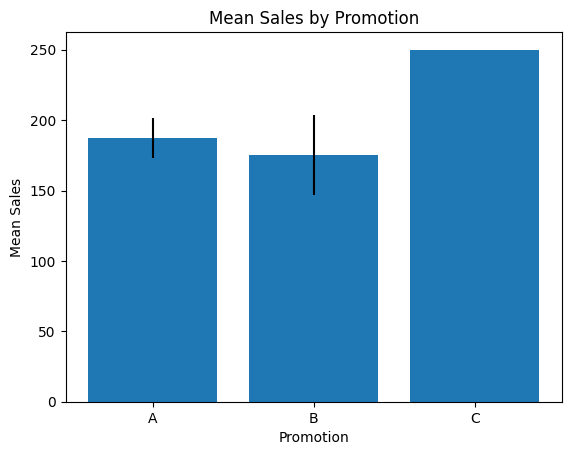

In [15]:
import matplotlib.pyplot as plt

# create the bar chart
plt.bar(mean_sales.index, mean_sales['Week 1 Sales'], yerr=confidence_interval['Week 1 Sales'])

# add labels to the axes
plt.xlabel('Promotion')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Promotion')

# show the chart
plt.show()
